In [9]:
import pandas  as pd
import numpy as np


car_sales = pd.read_csv("Data/car-prices.csv")

In [10]:
car_sales.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [11]:
to_change = {'no':0,'yes':1}
car_sales.sold = car_sales.sold.map(to_change)

In [18]:
from datetime import datetime
car_sales['age'] = datetime.today().year - car_sales.model_year 

car_sales['km_by_year'] = car_sales['mileage_per_year']*1.60934

car_sales = car_sales.drop(columns =['Unnamed: 0', 'mileage_per_year','model_year' ])

Using Linear SVC:

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = car_sales[['price','age','km_by_year']]
y= car_sales['sold']

SEED = 5
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
model = LinearSVC()
model.fit(train_x, train_y)
predict = model.predict(test_x)

accuracy = accuracy_score(teste_y, predict) * 100
print("The accuracy was: %.2f%%" % accuracy)

The accuracy was: 58.00%


C:\Users\r9kx\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Using SVC:

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)


model = SVC()
model.fit(train_x, train_y)
previsoes = model.predict(test_x)

accuracy = accuracy_score(test_y, previsoes) * 100
print("The accuracy was: %.2f%%" % accuracy)

The accuracy was: 76.96%


Using  Decision Tree:

In [50]:
from sklearn.tree import DecisionTreeClassifier

x = car_sales[['price','age','km_by_year']]
y= car_sales['sold']

SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)


model = DecisionTreeClassifier(max_depth = 3)
model.fit(raw_train_x, train_y)
previsoes = model.predict(raw_test_x)

accuracy = accuracy_score(test_y, previsoes) * 100
print("The accuracy was: %.2f%%" % accuracy)

The accuracy was: 79.28%


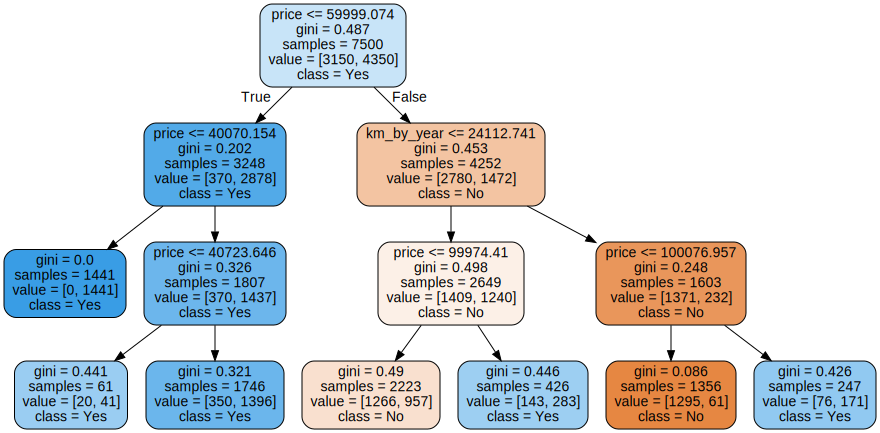

In [51]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["No", "Yes"])
tree = graphviz.Source(dot_data)

tree
